# 2. PyTorch Workflow Fundamentals

In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import torch
import time
from torch import nn

In [52]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"}

what_were_covering                      

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [53]:
# data (preparing and loading)

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [54]:
# splitting data into training and test sets

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [55]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")

    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')

    plt.legend(prop={'size': 14})

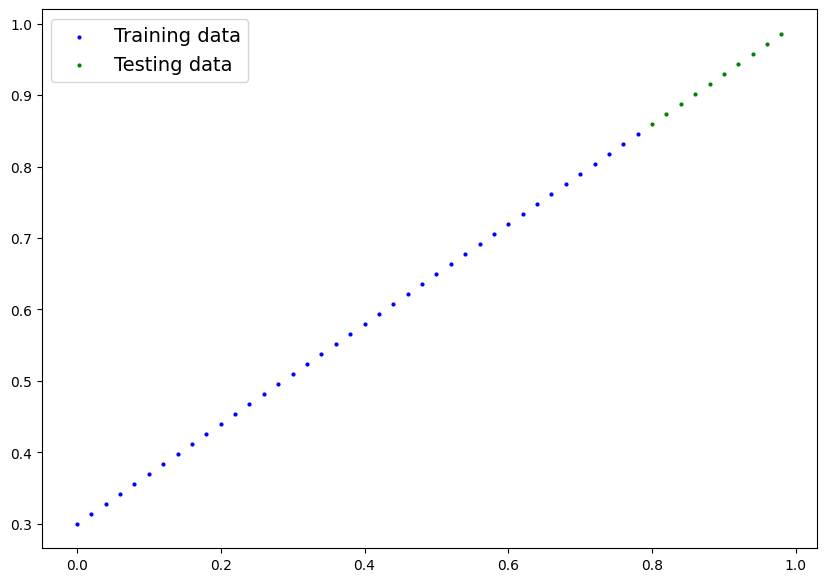

In [56]:
plot_predictions()

In [57]:
# Build model

class LinearRegressionModel(nn.Module): 
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, 
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, 
                                                requires_grad=True, 
                                                dtype=torch.float))
        
    def forward(self, x:torch.Tensor) -> torch.Tensor: # x is the input data
        return self.weights * x + self.bias


In [58]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [59]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [60]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [61]:
# make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

y_preds    

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

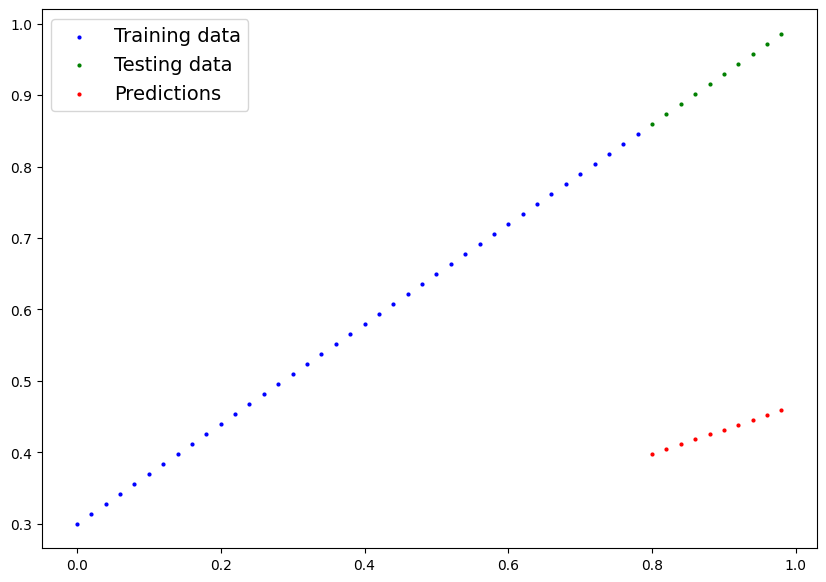

In [62]:
plot_predictions(predictions=y_preds)

In [63]:
# training model

#loss_fn = nn.L1Loss()
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [64]:
epochs = 161 # is one loop through the data

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()

    y_pred = model_0(X_train)

    loss = loss_fn(y_pred, y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)

        # 2. Caculate loss on test data
        test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

        # Print out what's happening
        if epoch % 10 == 0:
                epoch_count.append(epoch)
                train_loss_values.append(loss.detach().numpy())
                test_loss_values.append(test_loss.detach().numpy())
                print(f"Epoch: {epoch} | MAE Train Loss: {loss:} | MAE Test Loss: {test_loss} ")


Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE

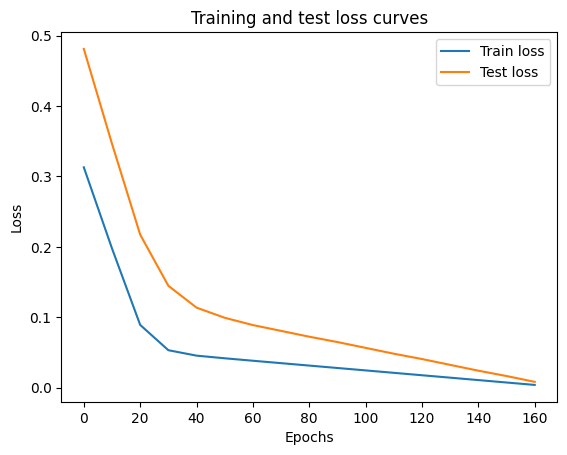

In [65]:
plt.plot(epoch_count, train_loss_values, label = 'Train loss')
plt.plot(epoch_count, test_loss_values, label = 'Test loss')
plt.title("Training and test loss curves")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [66]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)


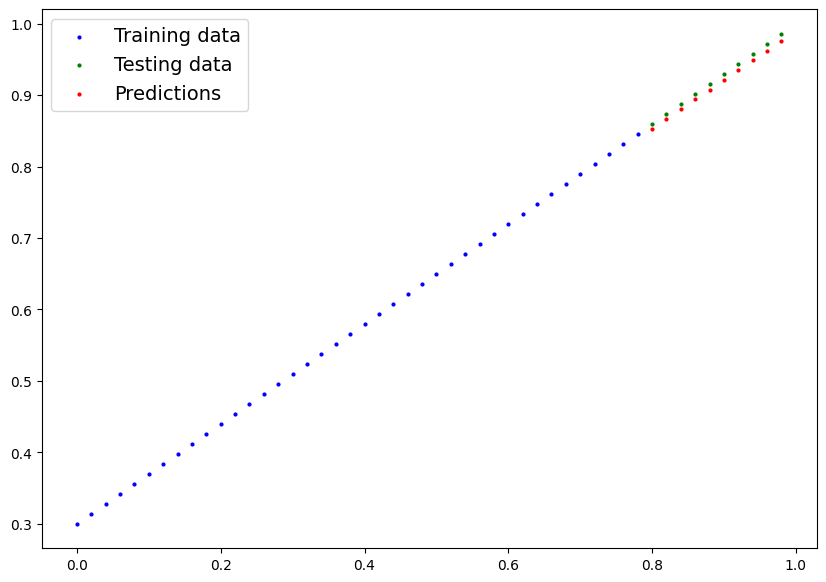

In [67]:
plot_predictions(predictions=y_preds_new)

In [68]:
# saving a model

from pathlib import Path

MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = '01_linear_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

WindowsPath('models/01_linear_model_0.pth')

In [69]:
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models\01_linear_model_0.pth


In [70]:
# loading pytorch models

model_0.state_dict()

OrderedDict([('weights', tensor([0.6826])), ('bias', tensor([0.3073]))])

In [71]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [72]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6826])), ('bias', tensor([0.3073]))])

In [73]:
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds


tensor([[0.8534],
        [0.8670],
        [0.8807],
        [0.8943],
        [0.9080],
        [0.9216],
        [0.9353],
        [0.9489],
        [0.9626],
        [0.9762]])

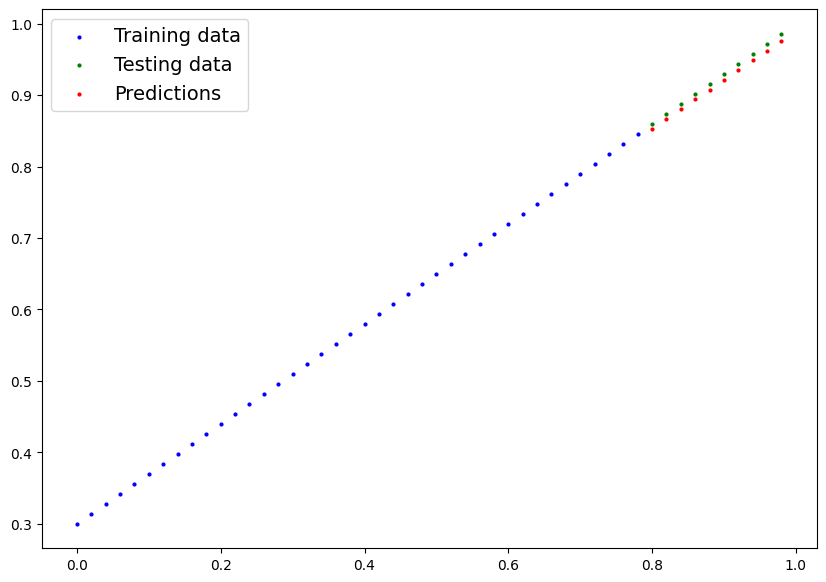

In [74]:
plot_predictions(predictions=loaded_model_preds)

# Putting it all together

In [75]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f'Using device: {device}')


Using device: cuda


In [76]:
weight = 0.5
bias = 0.9

start = 0
end = 1
step = 0.02

X = torch.arange(start, end,step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9100],
         [0.9200],
         [0.9300],
         [0.9400],
         [0.9500],
         [0.9600],
         [0.9700],
         [0.9800],
         [0.9900]]))

In [77]:
train_split = int(0.7 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]


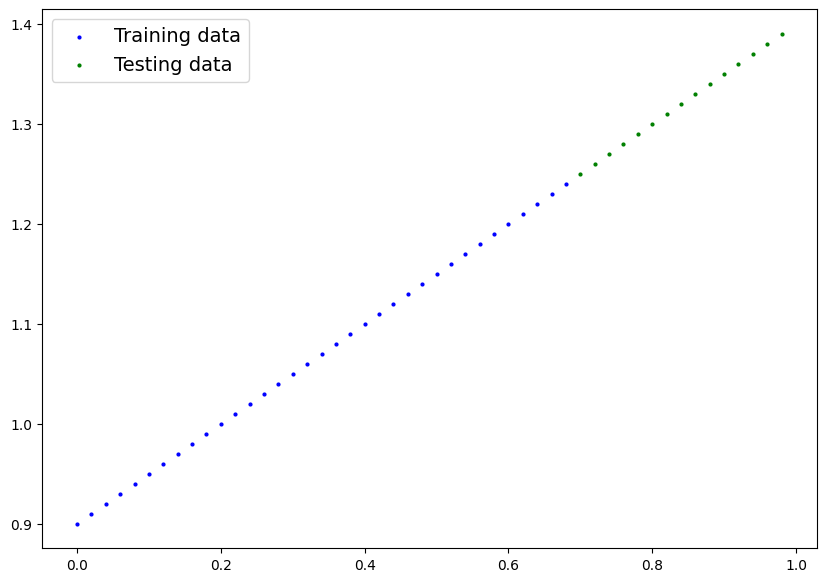

In [78]:
plot_predictions(X_train, y_train, X_test, y_test)

In [79]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()   

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [80]:
model_1.to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

In [81]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)


In [82]:
torch.manual_seed(42)

X_train_cuda = X_train.to(device)
X_test_cuda = X_test.to(device)
y_train_cuda = y_train.to(device)
y_test_cuda = y_test.to(device)

epochs = 200

for epoch in range(epochs):
    model_1.train()

    y_pred = model_1(X_train_cuda)

    loss = loss_fn(y_pred, y_train_cuda)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test_cuda)

        test_loss = loss_fn(test_pred, y_test_cuda)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")    

Epoch: 0 | Loss: 0.04843267798423767 | Test loss: 0.14823797345161438
Epoch: 10 | Loss: 0.04265398159623146 | Test loss: 0.12194971740245819
Epoch: 20 | Loss: 0.03968476504087448 | Test loss: 0.10946556180715561
Epoch: 30 | Loss: 0.0369112528860569 | Test loss: 0.09993903338909149
Epoch: 40 | Loss: 0.03419066220521927 | Test loss: 0.09264514595270157
Epoch: 50 | Loss: 0.03147007152438164 | Test loss: 0.08535125851631165
Epoch: 60 | Loss: 0.028742443770170212 | Test loss: 0.07805733382701874
Epoch: 70 | Loss: 0.026013899594545364 | Test loss: 0.07076345384120941
Epoch: 80 | Loss: 0.023290665820240974 | Test loss: 0.06272535771131516
Epoch: 90 | Loss: 0.020570067688822746 | Test loss: 0.05543144792318344
Epoch: 100 | Loss: 0.017847510054707527 | Test loss: 0.04813757911324501
Epoch: 110 | Loss: 0.015118962153792381 | Test loss: 0.04084368050098419
Epoch: 120 | Loss: 0.012390654534101486 | Test loss: 0.03280555456876755
Epoch: 130 | Loss: 0.009670066647231579 | Test loss: 0.02551169507205

In [83]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5044]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8917], device='cuda:0'))])

In [84]:
model_1.eval()

with torch.inference_mode():
    y_preds = model_1(X_test_cuda)


    

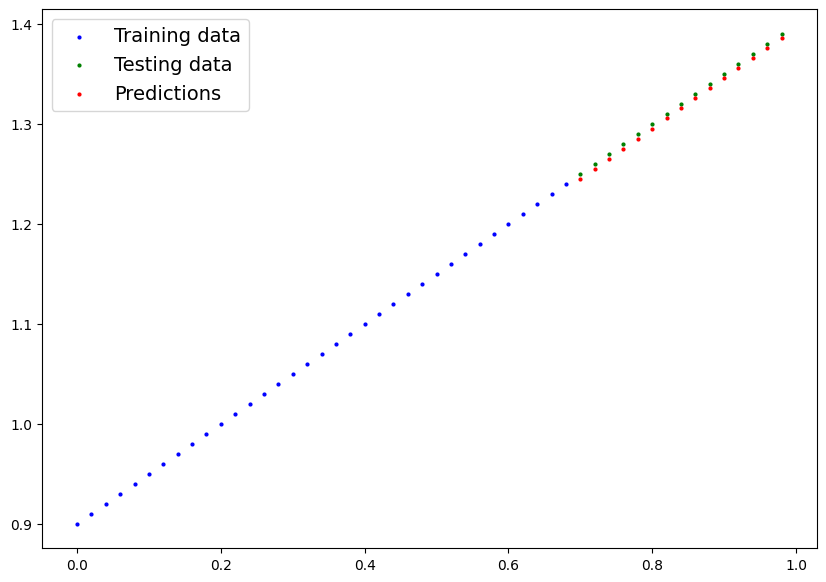

In [85]:
plot_predictions(X_train,y_train,X_test,y_test,predictions=y_preds.cpu())

In [86]:
MODEL_NAME = "01_linear_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

print(MODEL_SAVE_PATH)

models\01_linear_model_1.pth


In [87]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [88]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [89]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.5044]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.8917], device='cuda:0'))])

In [90]:
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test_cuda)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

In [91]:
# Exercises

weight = 0.3
bias = 0.9
start = 0
end = 10
step = 0.1
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X), len(X_train), len(y_train), len(X_test)

(100, 80, 80, 20)

In [92]:
def plot_pred(X_train=X_train, y_train=y_train,X_test=X_test, preds=None):

    plt.figure(figsize=(10,7))
    plt.scatter(X_train, y_train, c='b', s=3, label="Training data")
    plt.scatter(X_test, y_test, c='g', s=3, label="Test data")
    
    if preds != None:
        plt.scatter(X_test, preds, c='r', s=3, label="Predictions")

    plt.legend()
    plt.show()    

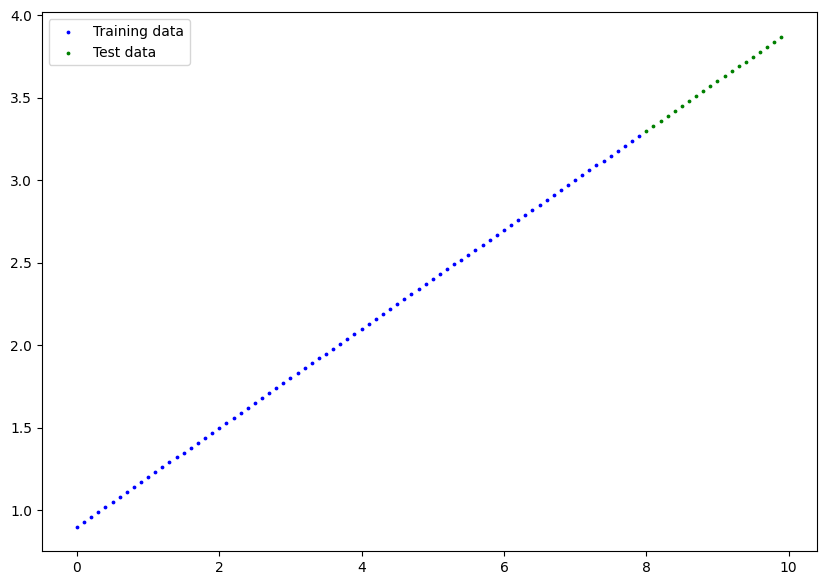

In [93]:
plot_pred()

In [94]:
class LinearModelExercise(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(17)
exercise_model = LinearModelExercise()   
exercise_model.state_dict()     

OrderedDict([('linear_layer.weight', tensor([[-0.1315]])),
             ('linear_layer.bias', tensor([0.0702]))])

In [95]:
loss_fn_ex = nn.L1Loss()
optimizer_ex = torch.optim.SGD(params=exercise_model.parameters(), lr=0.01)

In [96]:
epochs = 300

for epoch in range(epochs):
    exercise_model.train()

    y_pred = exercise_model(X_train)

    loss = loss_fn_ex(y_pred,y_train)
    
    optimizer_ex.zero_grad()

    loss.backward()

    optimizer_ex.step()
    
    exercise_model.eval()
    with torch.inference_mode():
        if epoch % 20 == 0:
            test_preds = exercise_model(X_test)

            loss_test = loss_fn_ex(test_preds, y_test)

            print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {loss_test}")


exercise_model.state_dict()

Epoch: 0 | Loss: 2.5342750549316406 | Test loss: 4.328337669372559
Epoch: 20 | Loss: 0.2779805660247803 | Test loss: 0.40117818117141724
Epoch: 40 | Loss: 0.24414055049419403 | Test loss: 0.3533002734184265
Epoch: 60 | Loss: 0.21030056476593018 | Test loss: 0.30542242527008057
Epoch: 80 | Loss: 0.17646053433418274 | Test loss: 0.257544606924057
Epoch: 100 | Loss: 0.1426168531179428 | Test loss: 0.20966677367687225
Epoch: 120 | Loss: 0.10876680910587311 | Test loss: 0.1620125025510788
Epoch: 140 | Loss: 0.07491374760866165 | Test loss: 0.11502871662378311
Epoch: 160 | Loss: 0.07686569541692734 | Test loss: 0.33370310068130493
Epoch: 180 | Loss: 0.03295443579554558 | Test loss: 0.2901380956172943
Epoch: 200 | Loss: 0.030290890485048294 | Test loss: 0.347777783870697
Epoch: 220 | Loss: 0.013559972867369652 | Test loss: 0.3663834035396576
Epoch: 240 | Loss: 0.03586414083838463 | Test loss: 0.3044537603855133
Epoch: 260 | Loss: 0.03012687899172306 | Test loss: 0.3114410638809204
Epoch: 280 

OrderedDict([('linear_layer.weight', tensor([[0.2956]])),
             ('linear_layer.bias', tensor([0.8902]))])

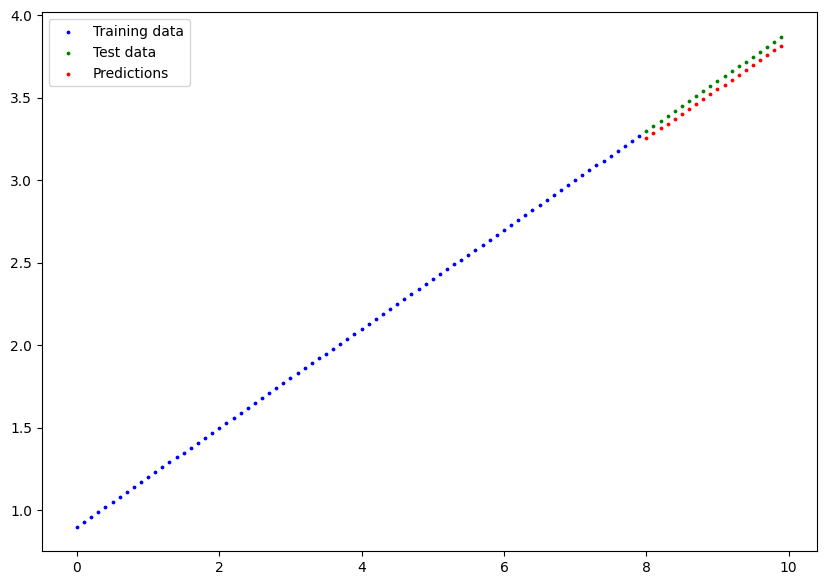

In [97]:
exercise_model.eval()
with torch.inference_mode():
    y_predict = exercise_model(X_test)

plot_pred(preds=y_predict)    

In [98]:
MODEL_NAME = Path('01.linear_model_exercise.pth')
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=exercise_model.state_dict(),
           f=MODEL_SAVE_PATH)


In [99]:
loaded_model_ex = LinearModelExercise()

loaded_model_ex.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

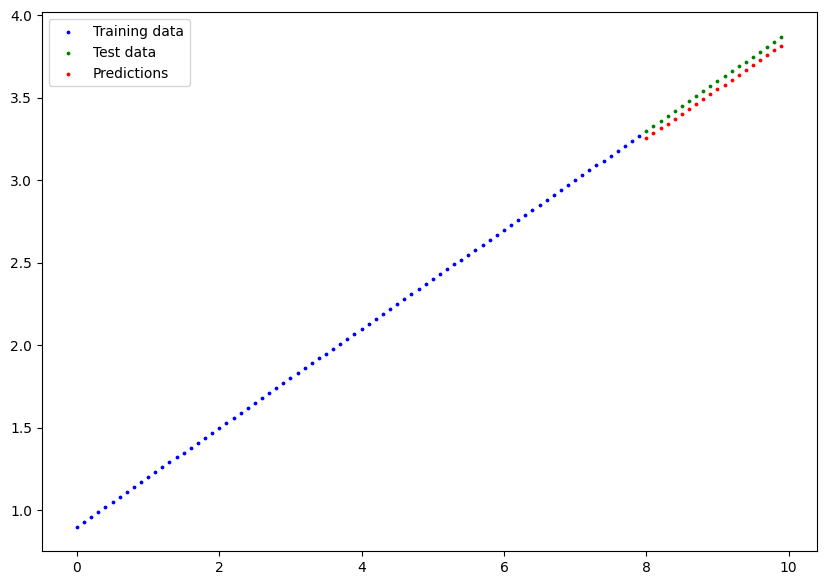

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [100]:
loaded_model_ex.eval()
with torch.inference_mode():
    loaded_model_ex_preds = loaded_model_ex(X_test)

plot_pred(preds=loaded_model_ex_preds)

y_predict == loaded_model_ex_preds